# Step by step guide to accesspr (Version 4.89)

accesspr alows you to process, analyse and integrate information from many plate reader experiments to create publication-grade plots.



<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [16]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Getting started

Before starting, make sure of the following

1. Get familiar with the [Swain lab plate reader software/class](http://swainlab.bio.ed.ac.uk/software/platereader/platereader.html).

2. To get the best out of accesspr, I highly recommend getting familiar with [pandas dataframes](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html#tutorial-modern) and about the [seaborn visualization package](http://stanford.edu/~mwaskom/software/seaborn/index.html) .

3. [Install the seaborn package](http://stanford.edu/~mwaskom/software/seaborn/installing.html)


We aim to extract information from a complex dataset and it is not immediately obvious how to approach the data.  Complexities include

* data comes from different plate reader machines with different properties. 
* there are different ways to process the data.
* there is a large combination of strains and conditions.
* Some wells in some experiments failed and we need to exclude them. or at lease we want to test what happens if we include them. But we don't necessarily know where they are
* we want to group the observations into different groups, like the strain or the media used, or the experiment in which they appear.

## About the sample data ##

This dataset was generated to characterise the expression dynamics of hexose transporter Hxt4 in Saccharomyces cerevisiae at different glucose levels.
The transporter was c-terminally tagged with yEGFP in a wild type strain as well in strains with deletions of glucose sensor Rgt2 and repressor Std1.
Cells were grown to stationary phase and put into fresh media with different amounts of glucose.

We aim to compile the results from several experiments. In a  total of 6 experiments, each of which has:

~12 blank (media) wells
3 concentrations X 7 technical replicates X 4 strains--->

* 229.WT- the untagged wild type

* 409.Hxt4- the tagged wild type

* 403.Hxt4std1- the std1 deletion

* 506.Hxt4rgt2- the rgt2 deletion

X 2 biological replicates at least.

As you can see, this dataset is quite complex, and it is not immediately obvious how to approach the data. the complexities include:

* all the data is in the form of time series
* the sampling times of different experiments vary, making it hard to merge biological replicates.

Additionally, you know the contents, but you don't know exactly **what condition is found where**. this makes analysis extremely tedious, especially for repetitive tasks.

plus, these experiments were made by a human and everything that implies. (for example, some strains or conditions might be mislabelled and we don't want to take the labeling for granted). 

## PROPER START

We start by moving to the folder where accesspr is. Then we import pandas, numpy and seaborn and accesspr

In [1]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr


In [2]:
from accesspr import *
import seaborn as sns
#import platereader as pr
#%matplotlib inline


# SECTION 1. Organising and importing your data in batch

## Batch import of Raw data from lists of folders
accesspr receives a data path that contains experiment folders. Each experiment folder contains a plate reader data file (excel) and a contents file ('XXcontents.xls'). You can add multiple data paths.

datapath1

------experiment 1

--------------data sheet.xlsx

--------------contents.xls

------experiment 2

--------------data sheet.xlsx

--------------contents.xls

datapath2

------experiment 1

--------------data sheet.xlsx

--------------contents.xls

------experiment 2

--------------data sheet.xlsx

--------------contents.xls

## Batch import of processed data from pickle files

The folder that you provide can also have pickle files (*.pkl) containing swain lab plate reader objects. 

**Accesspr will try to import all pickle files and experiment folders by default.** To ignore all pickle files, do ignorepickles=True, or to ignore excel files, do ignorexls=True.


**Why is this useful**: extracting statistics on individual experiments is a lengthy process and sometimes you have already done it for some experiments. You would like to integrate this data with new experiments. 

**For more information about processing and saving individual experiments into pickles, see Appendix 1.**

## Initialising an accesspr object:  Declaring consensus fluorescence(s)

Accesspr needs to know what fluorescence is the main fluroescence for each experiment. You can force a consensus if all your experiments have the same, you could search for a consensus or assign each FL individually to every experiment. 

### Decision point:
#### A) Let the software find and  assign fluorescence automatically

analyseFL=True (default) or do nothing.

#### B)  Your expts do not have fluroescence measurements

analyseFL=False . but this is not strictly necessary to declare

#### C) Your expts have a known unifying fluorescence measurement

do FL=NAME_OF_FL_CHANNEL (e.g.FL='GFP80')

#### C) Each experiment each has a different fluorescence measurement

FL=['GFP', 'G_F_P', 'GFP80'] will first look for GFP in an experiment. If we fail, we then prioritise 'G_F_P' and so on.

The output is the self.FL dictionary. This contains the names of the FL, FLperod and supporting fluorescence (if any) for every experiment.



In [8]:
homedir= '/Users/s1259407'
datapath='/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData'
picklefolder='./accesspr_demo/processedPickles'
####WE INITIALISE ACCESSPR. We choose A: to look for fluorescences automatically
#self=accesspr(homedir+datapath, analyseFL=True)

####ALTERNATIVELY INITIALISE USING PREPROCESSED individual DATA PICKLES
self=accesspr(picklefolder, analyseFL=True)


accesspr version4.89
trying to import pickle 20160212_77_hxt1_hxt2_hxt4.pkl
trying to import pickle 20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet.pkl
trying to import pickle 20160630_229_hxt4_std1_rgt2_p2_1_2_rep2.pkl
trying to import pickle 20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1.pkl
trying to import pickle 20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2.pkl
The following files could not be imported:

Scalar variables registered (found in self.extractionFieldsScalar:


Time-varying variables registered (found in self.extractionFieldsTime:


Scalar variables registered (found in self.extractionFieldsScalar:
OD gp
OD logmaxlike
OD_GP
area under gr vs OD
area under gr vs OD var
corrections
doubling time
doubling time var
gp1ref for GFP
ignoredwells
lag time
lag time var
local max gr
local max gr var
log2 OD ratio
log2 OD ratio var
max OD
max OD var
max gr
max gr var
normalized area under gr vs OD
normalized area under gr vs OD var
plateloc
refstrain
time of local max gr
time of local max gr var

In [21]:
self.failedfiles

[['/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160701_229_hxt4_std1_rgt2_p4_1_1p5/20160701_229_hxt4_std1_rgt2_p4_1_1p5.xlsx',
  '/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160701_229_hxt4_std1_rgt2_p4_1_1p5/20160701contents.xls'],
 ['/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160702_229_hxt4_std1_rgt2_p4_1_1p5/20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2.xlsx',
  '/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160702_229_hxt4_std1_rgt2_p4_1_1p5/20160702contents.xls']]

 **To learn  more about what happens during initialisation, how to modify the experiment import, and how to edit fluorescence manually, see Appendix 2**

**Some experiments fail to import. to know hot to deal with these experiments, see Appendix 3**

# SECTION 2. Exploring your dataset 


## Where to find the data

**self.data** = dictionary of platereader instances (the experiments that were loaded).
The keys are each experiment's name, and the values are pr objects of each experiment. This means you have full access to the experiments you provided

## Useful dataframes to explore your dataset

 **self.allreplicates - Fundamental dataframe at the core of accesspr. Description of every well in terms of experiment media, strain, plate coordinates (plateloc)** 

**self.statcontents** - dataframe that indicates what fraction (0< p< 1) of the experiment contains a given statistic. all the time varying statistics of the experiment.(add more statistics using  xpr.containsstat(stat). when a stat is not found in any experiment, it is not added).

**self.allcontents** - similar to above, just that plateloc is a list of all the wells with this condition.

**self.numReplicates** - how many biological replicates there is per condition.

**self.conditionLocTable** - dataframe of 0s and 1s declaring relating conditions to experiments.(you make numReplicates from this one). can allow you to not 

## Useful lists

self.allstrains - all the strains in every experiment

self.allmedia - all the media (conditions) in every experiment

self.allexperiments- list of all the experiments

self.machines - the ID of the machine that ran the experiment. To make this make sure to incorporate your own serial number and give it an ID

self.extractionFieldsScalar -variables useful for data extraction, particularly those that are a single number. this list gets generated by the method xpr.getvariables.

self.extractionFieldsTime- variables useful for data extraction, particularly those that are a single number. This list gets generated by the mthod xpr.getvariables.

## finding what experiments contain a specific condition

self.containssetup(media,strain) will give you a list of experiments that contain such condition


## Overviewing the contents of the experiments

We will quickly screen the contents of the experiments.

First we list the content, then we check if any experiment has mCherry with xpr.containsstat(stat)

then we retrieve the entire list of statistics found in the experiment, saved in xpr.statcontents.  the method xpr.containsstat will update this table as long as one of the expeirments contains the desired condition. We will find that mCherry was not added because mCherry is absent from all experiments, so no point adding it in the first place. 

## Visual Overview of a particular experiment

self.overview() allows us to visualise an experiment in our accesspr dataset to make sure everything is right. this is useful when we suspect there has been some mislabeling. 



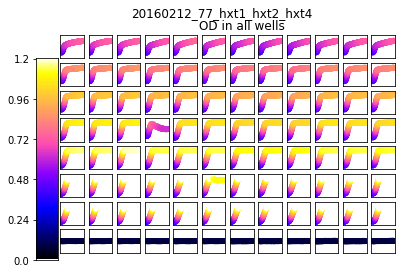

In [4]:
##visualising the contents of experiment 0 of the experiment list.
#axarray is just a handle to the axes of the plate viz.
axarray=self.overview(0, dtype='OD', colormap='gnuplot2', colorMapRange=[0, 1.2] )

In [44]:
#displaying all replicates. This dataframe will be key in downstream proceduresso keep it in mind
self.allreplicates

,experiment,media,strain,plateloc
0,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A1
1,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A2
2,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A3
3,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A4
4,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A5
5,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A6
6,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A7
7,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A8
8,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A9
9,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt4,A10


In [9]:
#Second most useful dataframe: .statcontents.tells you what statistics or variables have been 
#calculated or exist in every experiment. 
self.statcontents


,gr,GFP,AutoFL,AutoFL mean,AutoFL var,GFP mean,GFP var,OD,OD mean,OD var,time
20160212_77_hxt1_hxt2_hxt4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20160630_229_hxt4_std1_rgt2_p2_1_2_rep2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
##Now Lets have a look at our data dictionary. self. data contains the actual
#curves per experiment
self.data


{'20160212_77_hxt1_hxt2_hxt4': <platereader.platereader at 0x1c187c65f8>,
 '20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': <platereader.platereader at 0x1c18082b38>,
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': <platereader.platereader at 0x1c188428d0>,
 '20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1': <platereader.platereader at 0x105715160>,
 '20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2': <platereader.platereader at 0x1c18cc79b0>}

## Finding experiments with a particular condition

In the end, xpr.listcontents() provides a comprehensive list. But we are lazy and want a list of all experiments that contain a specific combination of media and strain. therefore we do:

In [17]:
media='Glu 2%'
strain='409.Hxt4'
self.containssetup(media, strain, strict=False) #we interrogate which experiments contain the desired condition. 
#It automatically looks for experiments where growth rate has been calculated, unless we specify strict to be False
print('experiments with such condition:' ,self.containslist) #containslist temporarily stores the list of experiments that have the condition 
self.containssetup(media, strain, strict=True) #we interrogate which experiments contain the desired condition. 
print('experiments with such condition and growth rate calculated for it:' ,self.containslist)

#Warning: containslist gets modified constantly so make sure you call containssetup when you need it.


experiments with such condition: ['20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet', '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2']
experiments with such condition and growth rate calculated for it: ['20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet', '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2']


## Accessing the raw curves of each experiment

Text(0.5, 1.0, 'HXT4 GFP')

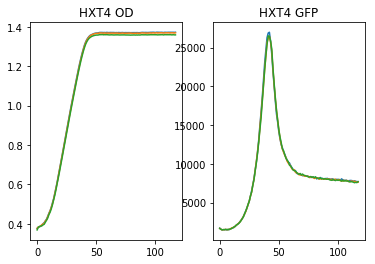

In [26]:
##PLOTTING INDIVIDUAL RAW CURVES WITHIN EACH EXPERIMENT
plt.subplot(1,2,1)
plt.plot(self.data['20160212_77_hxt1_hxt2_hxt4'].d['Glu 2%']['Hxt4']['OD'])
plt.title('HXT4 OD')
plt.subplot(1,2,2)
plt.plot(self.data['20160212_77_hxt1_hxt2_hxt4'].d['Glu 2%']['Hxt4']['GFP'])
plt.title('HXT4 GFP')

# SECTION 3. Data processing

Processing of the plate reader data involves 6 steps. 


1) **Data curation**

This step involves general inspection of the data to make sure its quality is acceptable. 

Normally this involves plotting raw data, ignoring wells with faulty growth, fixing the presence of NaNs in some curves or outright  removal of faulty experiments.

2) **Data preprocessing**

This normally means getting correcting NaNs where possible and adjusting for differences among platereaders. **For more information about preprocessing this See Appendix 4**

2) **correcting OD**

In the plate reader, the Measured OD does not correspond to real OD because the OD measurements saturate at 1.4. therefore the OD has undergo a non linear transformation get a more accurate estimate.

3) **correcting autofluorescence**
Yeast cells have a natural autofluorescence that changes over time. correcting Fluorescence processes the fluorescence such that the autofluorecence of untagged strains is zero.

4) **calculating growth statistics using gaussian processes**
to estimate statistics like the growth rate, the derivative of growth rate, lag time 

5) **Uniform data sampling**
Timepoints are inconsistent across experiments and therefore not immediately compatible. 
We make sure to get consistent and uniform sampling times for the experiments. 


## Accessing experiments and Running plate reader routines within accesspr

If we notice NaNs in the c-GFPperod field above, we can run correctauto individually for each of them in order to analyse them. Then we check how the statContents has been updated.



## Assessing replicate quality

It is important to assess how reproducible is the growth and fluorescence of individual experiments before proceeding to 
do more complicated analyses. we have 7 within-experiment replicates per condition, and 2 biological replicates. lets assess how they vary by plotting the raw data. 

**For more info on colour management, please see Apendix 6**

{'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': '#ccbd68',
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': '#1b4976'}

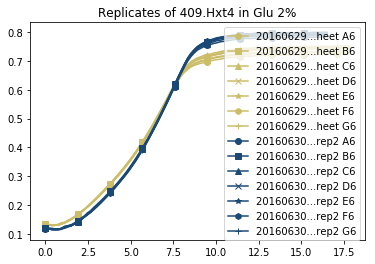

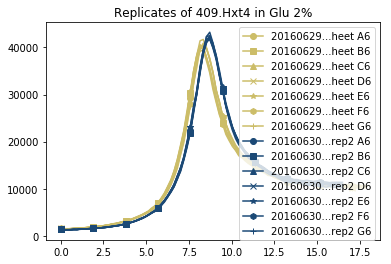

In [11]:
media='Glu 2%'
strain='409.Hxt4'
exptColors=self.plotrawreplicates(media,strain, dtype='OD')
plt.figure()
self.plotrawreplicates(media,strain, dtype='GFP', exptColors=exptColors)


## Explore the variance in your dataset clicking through a PCA of the data

(clicking only outside the jupyter notebook)

We want to expore the replicate of 2% glucose only. 
so we use self.allreplicates and get the replicates at 2% glucose usinf DFsubset.
Additionally we want to color each observation according to the strain type
alsp preset in self.allreplicates. 
Notice that the times argument defines which timepoints will be used for the dimensionality reduction (more about this later).

The output is the PCA object which can be reused (See scikit.learn documentation), and selection, a small dataframe of the selected observations.

The function is sensitive to scale effects. rownorm=True puts all observations on the same scale subtracting the time average and dividing by the standard deviation.


/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr.py:2379: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  varindex=find(reps.columns.values==colorby);
No handles with labels found to put in legend.


setting interpolation limit with new information


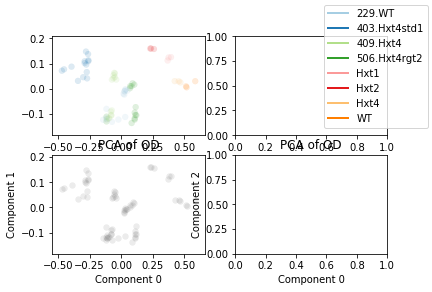

In [6]:
pca, selection=self.pcaclick( reps=DFexclude(DFsubset(self.allreplicates, 'media', ['Glu 2%']), 'strain', 'null'), dtype='OD', components=[0,1,2], colorby='strain', rownorm=False,color=colors.strongColors, times=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], dotsize=.2, alpha=0.15, clicknumber=0)     


## Correcting OD and fluorescence in batch

This command is still in process but normally a simple for loop suffices.
Do not forget to run xpr.listcontents() as this will update all the statistics in the structure.

experiment 20160212_77_hxt1_hxt2_hxt4 :
fluorescences used:
['GFP']


Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


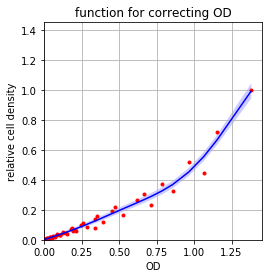



Using WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%
Processing reference strain for GFP in Glu 0.4%
Processing reference strain for GFP in Glu 0.6%
Processing reference strain for GFP in Glu 0.8%
Processing reference strain for GFP in Glu 1%
Processing reference strain for GFP in Glu 1.5%
Processing reference strain for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
experiment 20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet :
fluorescences used:
['GFP']


Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


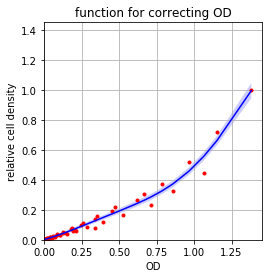



Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%
Processing reference strain for GFP in Glu 1%
Processing reference strain for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
experiment 20160630_229_hxt4_std1_rgt2_p2_1_2_rep2 :
fluorescences used:
['GFP']


Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


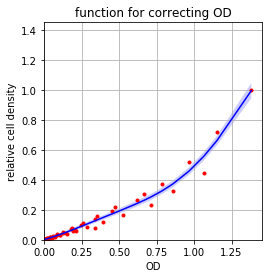



Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.2%
Processing reference strain for GFP in Glu 1%
Processing reference strain for GFP in Glu 2%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
experiment 20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1 :
fluorescences used:
['GFP']


Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


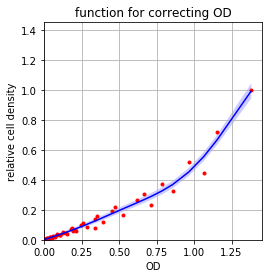



Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.6%
Processing reference strain for GFP in Glu 0.8%
Processing reference strain for GFP in Glu 1%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)
experiment 20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 :
fluorescences used:
['GFP']


Fitting dilution data for OD correction for non-linearities
Using ODcorrection_Glucose_Haploid.txt


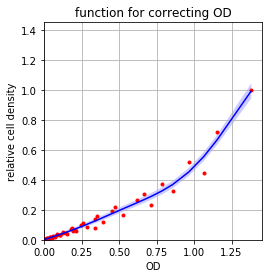



Using 229.WT as the reference
Correcting autofluorescence
Processing reference strain for GFP in Glu 0.6%
Processing reference strain for GFP in Glu 0.8%
Processing reference strain for GFP in Glu 1%
Created:
	c-GFPperod (corrected fluorescence per cell)
	c-GFP (corrected fluorescence)


In [78]:
#expt='p20160630.pkl'
#Standard correction of GFP Fluorescence
#refstrain must be a list containint all possible references for the experiment
self.correctauto(f=['GFP'], refstrain=['WT', '229.WT', '77.WT', 'REF'], correctmedia=False)
#CORRECTING autofluorescence with measurement of 485/585
#self.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'], correctmedia=False)

   



In [13]:
#checking how our data was updated after correcting
self.statcontents

,gr,GFP,c-GFPperod,AutoFL,AutoFL mean,AutoFL var,GFP mean,GFP var,OD,OD mean,...,c-GFP,c-GFP var,c-GFPperod var,d/dt gr,d/dt gr var,flogOD,flogOD var,fmerr for GFP,gr var,time
20160212_77_hxt1_hxt2_hxt4,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160630_229_hxt4_std1_rgt2_p2_1_2_rep2,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0


## Calculating growth statistics in batch for all the experiments.


You can call the getstats agument to do gaussian process fitting of your data. 

It will run for every experiment  in the list using the same parameters.

In [80]:
self.getstats(cvfn='nn', bd={0: [-2, 2]})


Performing non-parametric fitting of growth statistics using gaussian processes.

...
Experiment 20160212_77_hxt1_hxt2_hxt4 :


Fitting OD for Hxt1 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 6.832070e+02
hparam[0]= 1.206204e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 1.026170e-03 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 1.401341e-01 +/- 7.351637e-03 [7.351637e-04]
 time of max gr= 7.739244e-01 +/- 3.237344e-01 [3.237344e-02]
  doubling time= 4.959593e+00 +/- 2.538326e-01 [2.538326e-02]
         max OD= 2.956099e-01 +/- 2.305571e-03 [2.305571e-04]
       lag time= 1.671602e-02 +/- 1.725269e-02 [1.725269

log(max likelihood)= 8.022016e+02
hparam[0]= 1.087464e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 2.021333e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.518711e-01 +/- 1.407022e-03 [1.407022e-04]
 time of max gr= 2.977683e+00 +/- 8.691619e-02 [8.691619e-03]
  doubling time= 2.752078e+00 +/- 1.539040e-02 [1.539040e-03]
         max OD= 4.400965e-01 +/- 1.685771e-03 [1.685771e-04]
       lag time= 1.116459e+00 +/- 2.832882e-02 [2.832882e-03]

Fitting OD for Hxt2 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.710793e+02
hparam[0]= 1.165953e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e

log(max likelihood)= 8.421775e+02
hparam[0]= 2.337796e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 1.943912e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.948470e-01 +/- 1.238042e-03 [1.238042e-04]
 time of max gr= 3.817848e+00 +/- 6.377621e-02 [6.377621e-03]
  doubling time= 2.350912e+00 +/- 9.853231e-03 [9.853231e-04]
         max OD= 6.405979e-01 +/- 1.398949e-03 [1.398949e-04]
       lag time= 1.515167e+00 +/- 2.349197e-02 [2.349197e-03]

Fitting OD for Hxt2 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.976994e+02
hparam[0]= 2.578405e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-0

log(max likelihood)= 8.229320e+02
hparam[0]= 4.096351e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 2.863657e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.115560e-01 +/- 1.338806e-03 [1.338806e-04]
 time of max gr= 4.927291e+00 +/- 2.654944e-02 [2.654944e-03]
  doubling time= 2.224832e+00 +/- 9.537807e-03 [9.537807e-04]
         max OD= 1.000985e+00 +/- 2.012111e-03 [2.012111e-04]
       lag time= 1.671967e+00 +/- 2.634815e-02 [2.634815e-03]

Fitting OD for Hxt2 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 8.328569e+02
hparam[0]= 4.638021e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-0

log(max likelihood)= 1.295008e+03
hparam[0]= 1.055396e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 8.511283e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.656068e-01 +/- 1.900030e-03 [1.900030e-04]
 time of max gr= 3.176778e+00 +/- 8.212808e-02 [8.212808e-03]
  doubling time= 2.609807e+00 +/- 1.863163e-02 [1.863163e-03]
         max OD= 4.873341e-01 +/- 1.156643e-03 [1.156643e-04]
       lag time= 9.563449e-01 +/- 3.229760e-02 [3.229760e-03]

Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.260849e+03
hparam[0]= 2.405836e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.0

log(max likelihood)= 1.398019e+03
hparam[0]= 7.288694e-01 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 4.966626e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 1.516772e-01 +/- 1.919011e-03 [1.919011e-04]
 time of max gr= 1.549516e+00 +/- 8.070243e-02 [8.070243e-03]
  doubling time= 4.570616e+00 +/- 5.781349e-02 [5.781349e-03]
         max OD= 2.621432e-01 +/- 9.394134e-04 [9.394134e-05]
       lag time= 1.637801e-01 +/- 2.639147e-02 [2.639147e-03]

Fitting OD for 403.Hxt4std1 in Glu 0.2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.145717e+03
hparam[0]= 8.444714e-01 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1

log(max likelihood)= 1.591454e+03
hparam[0]= 2.108225e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 2.294810e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.876113e-01 +/- 9.521386e-04 [9.521386e-05]
 time of max gr= 4.022435e+00 +/- 7.724148e-02 [7.724148e-03]
  doubling time= 2.410040e+00 +/- 7.977547e-03 [7.977547e-04]
         max OD= 8.087526e-01 +/- 1.985716e-03 [1.985716e-04]
       lag time= 1.273252e+00 +/- 1.657537e-02 [1.657537e-03]

Fitting OD for 403.Hxt4std1 in Glu 2%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.474487e+03
hparam[0]= 2.589738e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.0

log(max likelihood)= 1.595922e+03
hparam[0]= 1.242609e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 3.780584e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.652191e-01 +/- 1.440724e-03 [1.440724e-04]
 time of max gr= 3.220124e+00 +/- 2.654944e-02 [2.654944e-03]
  doubling time= 2.613567e+00 +/- 1.423370e-02 [1.423370e-03]
         max OD= 4.794724e-01 +/- 6.917959e-04 [6.917959e-05]
       lag time= 1.026601e+00 +/- 2.534700e-02 [2.534700e-03]

Fitting OD for 403.Hxt4std1 in Glu 0.8%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.615529e+03
hparam[0]= 1.030362e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1

log(max likelihood)= 1.409746e+03
hparam[0]= 1.132827e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 4.098712e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.654486e-01 +/- 1.261096e-03 [1.261096e-04]
 time of max gr= 3.034333e+00 +/- 0.000000e+00 [0.000000e+00]
  doubling time= 2.611288e+00 +/- 1.239648e-02 [1.239648e-03]
         max OD= 4.508831e-01 +/- 7.858678e-04 [7.858678e-05]
       lag time= 1.005739e+00 +/- 2.236195e-02 [2.236195e-03]

Fitting OD for 403.Hxt4std1 in Glu 0.6%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.552606e+03
hparam[0]= 1.008985e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1

log(max likelihood)= 1.435011e+03
hparam[0]= 1.839913e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.000000e-07, 1.000000e-02]
hparam[2]= 4.435655e-04 [1.000000e-06, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 2.874241e-01 +/- 1.419288e-03 [1.419288e-04]
 time of max gr= 3.775794e+00 +/- 5.427119e-02 [5.427119e-03]
  doubling time= 2.411642e+00 +/- 1.189871e-02 [1.189871e-03]
         max OD= 6.495419e-01 +/- 9.914367e-04 [9.914367e-05]
       lag time= 1.202366e+00 +/- 2.238251e-02 [2.238251e-03]

Fitting OD for 403.Hxt4std1 in Glu 1%
Taking natural logarithm of the data.
Fitting measurement errors.
Using a neural network Gaussian process.
hparam[0] determines the initial value
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.379942e+03
hparam[0]= 1.370745e+00 [1.000000e-02, 1.000000e+02]
hparam[1]= 1.000000e-02 [1.0

In [15]:
###checking how our dataset stats have been updated
self.statcontents

,gr,GFP,c-GFPperod,AutoFL,AutoFL mean,AutoFL var,GFP mean,GFP var,OD,OD mean,...,c-GFP,c-GFP var,c-GFPperod var,d/dt gr,d/dt gr var,flogOD,flogOD var,fmerr for GFP,gr var,time
20160212_77_hxt1_hxt2_hxt4,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160630_229_hxt4_std1_rgt2_p2_1_2_rep2,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0
20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,1.0,1.0,1.0,1.0,0.25,1.0,1.0


It looks like all experiments have the growth rate calculated, and that 3/4  of the strains have the FLperod also calculated. I suspect the missing one is the untagged strain, for which the FLperod is not calculated. For now we won't bother too much about it.



# SECTION 4. Plotting time-series information

## Combining replicates from different experiments

The challenge of combining replicates from different experiments, besides the obvious fact that= matching replicates are disperesed within the dataset, is:

* **sampling times for the same time series vary.** one experiment may have been measured at 3 hours, whereas another one may have been measured at 3.2. Even though the times are similar, collapsing them together just like that would be not only wrong – we would lose important information about the timing of events.  

* **lag time variability of cell growth**. As we are studying cells from stationary phase, release from the lag could vary each time.

## The function self.plotrepmean simplifies all this for you:

a) select the replicates you want to include (defaults to those in self.allreplicates)

b) decide what x reference you want to use (either time or another variable)

c) group the replicates based on 'factor' 

d) interpolate and bootstrap the replicates of each condition **To learn more about bootstrapping and interpolation, see appendix 5**

e) use an arbitrary x variable to plot. it could be time, relative time, or even OD.










setting interpolation limit with new information


No handles with labels found to put in legend.


WT
[0, 1, 2]
Hxt1
[3, 4, 5]
Hxt2
[6, 7, 8]
Hxt4
[9, 10, 11]
229.WT
[12, 13, 14, 15, 16, 17, 18, 40, 41, 42, 43, 44, 45, 46]
409.Hxt4
[19, 20, 21, 22, 23, 24, 25, 47, 48, 49, 50, 51, 52, 53]
403.Hxt4std1
[26, 27, 28, 29, 30, 31, 32, 54, 55, 56, 57, 58, 59, 60]
506.Hxt4rgt2
[33, 34, 35, 36, 37, 38, 39, 61, 62, 63, 64, 65, 66, 67]
setting interpolation limit with new information
Error occured during processing of20160212_77_hxt1_hxt2_hxt4 Glu 2% WT  G1 c-GFPperod:
'c-GFPperod'
 filling vector with nans
Error occured during processing of20160212_77_hxt1_hxt2_hxt4 Glu 2% WT  G2 c-GFPperod:
'c-GFPperod'
 filling vector with nans
Error occured during processing of20160212_77_hxt1_hxt2_hxt4 Glu 2% WT  G3 c-GFPperod:
'c-GFPperod'
 filling vector with nans
Error occured during processing of20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet Glu 2% 229.WT  A3 c-GFPperod:
'c-GFPperod'
 filling vector with nans
Error occured during processing of20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet Glu 2% 229.WT  B

No handles with labels found to put in legend.


Hxt1
[3, 4, 5]
Hxt2
[6, 7, 8]
Hxt4
[9, 10, 11]
229.WT
[12, 13, 14, 15, 16, 17, 18, 40, 41, 42, 43, 44, 45, 46]
409.Hxt4
[19, 20, 21, 22, 23, 24, 25, 47, 48, 49, 50, 51, 52, 53]
403.Hxt4std1
[26, 27, 28, 29, 30, 31, 32, 54, 55, 56, 57, 58, 59, 60]
506.Hxt4rgt2
[33, 34, 35, 36, 37, 38, 39, 61, 62, 63, 64, 65, 66, 67]


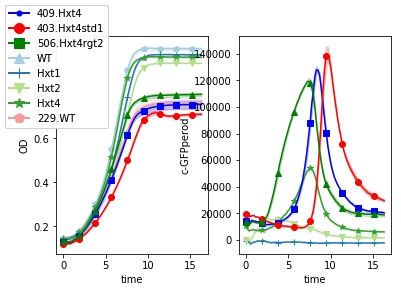

In [12]:
strainColors= {'409.Hxt4': 'blue', '403.Hxt4std1':'red', '506.Hxt4rgt2':'green'}




#Plot GFP curves at Glu 2%, grouping the by strain.
plt.tight_layout()
plt.subplot(1,2,1)
a,b,c= self.plotrepmean(conditionsDF=DFsubset(self.allreplicates, 'media', ['Glu 2%']), dtype='OD', factorColors=strainColors, factor='strain') 
plt.subplot(1,2,2)
a,b,c= self.plotrepmean(conditionsDF=DFsubset(self.allreplicates, 'media', ['Glu 2%']), dtype='c-GFPperod', factorColors=strainColors, factor='strain') 

#outputs: 
#a-the bootstrap (plotting) data
#b-the plotting colors 
#c-the ploting symbols.

#Note how strains which are not assigned colours are given one anyway.


In [42]:
c

{'229.WT': '.',
 '403.Hxt4std1': 'o',
 '409.Hxt4': 's',
 '506.Hxt4rgt2': '^',
 'Hxt1': '+',
 'Hxt2': 'v',
 'Hxt4': '*',
 'WT': 'p'}

## 'Synchronising' experiments through temporal alignment

Sometimes, different experiments have differences because of different cell dilution, or different lag in the strains. Therefore it may appear as though the curves are 'shifted'. Averaging shifted curves is ill defined and introduces artificial variation. To compare like to like, adjusting the timescale to account for those shifts can sometimes be useful. 

the routine self.alignAll() creates an alternative time vector relative to the time of max growth rate (time zero). This new time vector can later be called as the x variable in plotting routines.

## Plotting synchronised/aligned experiments (only if gr is calculated)

Let's see what difference it makes to plot the above, this time aligning all times to the max growth rate.

aligning experiment  20160212_77_hxt1_hxt2_hxt4
aligning experiment  20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet
aligning experiment  20160630_229_hxt4_std1_rgt2_p2_1_2_rep2
aligning experiment  20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1
aligning experiment  20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2
Experiments aligned successfully.
Experiments have already been aligned. to realign, try rerun=True
Scalar variables registered (found in self.extractionFieldsScalar:
OD gp
OD logmaxlike
OD_GP
area under gr vs OD
area under gr vs OD var
corrections
doubling time
doubling time var
gp1ref for GFP
ignoredwells
lag time
lag time var
local max gr
local max gr var
log2 OD ratio
log2 OD ratio var
max OD
max OD var
max gr
max gr var
normalized area under gr vs OD
normalized area under gr vs OD var
plateloc
refstrain
time of local max gr
time of local max gr var
time of max gr
time of max gr var

Time-varying variables registered (found in self.extractionFieldsTime:
AutoFL
AutoFL mean
AutoFL var
GFP
G

No handles with labels found to put in legend.


229.WT
[12, 13, 14, 15, 16, 17, 18, 40, 41, 42, 43, 44, 45, 46]
409.Hxt4
[19, 20, 21, 22, 23, 24, 25, 47, 48, 49, 50, 51, 52, 53]
403.Hxt4std1
[26, 27, 28, 29, 30, 31, 32, 54, 55, 56, 57, 58, 59, 60]
506.Hxt4rgt2
[33, 34, 35, 36, 37, 38, 39, 61, 62, 63, 64, 65, 66, 67]


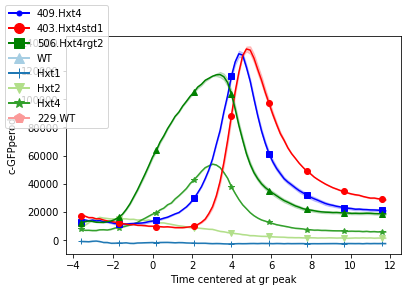

In [87]:
self.alignAll(rerun=True)
strainColors= {'409.Hxt4': 'blue', '403.Hxt4std1':'red', '506.Hxt4rgt2':'green'}


#Plot GFP curves at Glu 2%, grouping the by strain, centering at gr peak
a,b,c= self.plotrepmean(conditionsDF=DFsubset(self.allreplicates, 'media', ['Glu 2%']), dtype='c-GFPperod', factorColors=strainColors, factor='strain', centeringVariable='Time centered at gr peak') 


We can also do the same plot for multiple media (one strain). Therefore we can spot any processing faults and problematic conditions if they exist.

## Extracting data into dataframes

Dataframes are tables that contain any kind of numeric or catgorical information.

You can use the function makedataframe to  extract in three formats: timerow, timecol, notime. 
    
notime  refers to point statistics of the culture.
the other two  give you the time in rows or columns. they are similar but useful in different
ways. 
in timecol, you can add virtually any timepoint you prefer, but you must specify such list of timepoints. 
In timerow, there is a default time to extract, so you do not need to specify timepoints by default. 


In [88]:
df=self.makedataframe('timecol', dtype='OD', times=[0,1,2,3,4,5,6,7])
df

,experiment,machine,media,strain,0,1,2,3,4,5,6,7
0,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,0.155795,0.166328,0.199328,0.229430,0.242601,0.248629,0.253548,0.257612
1,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,0.155795,0.166328,0.199328,0.229430,0.242601,0.248629,0.253548,0.257612
2,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,0.155795,0.166328,0.199328,0.229430,0.242601,0.248629,0.253548,0.257612
3,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt1,0.148183,0.157268,0.184260,0.215709,0.231109,0.238212,0.242820,0.246770
4,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt1,0.148183,0.157268,0.184260,0.215709,0.231109,0.238212,0.242820,0.246770
5,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,0.137357,0.144590,0.171813,0.201156,0.216003,0.222263,0.226518,0.230590
6,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,0.137357,0.144590,0.171813,0.201156,0.216003,0.222263,0.226518,0.230590
7,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,0.137357,0.144590,0.171813,0.201156,0.216003,0.222263,0.226518,0.230590
8,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt4,0.146517,0.159333,0.191763,0.221165,0.233295,0.238892,0.243027,0.246840
9,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt4,0.146517,0.159333,0.191763,0.221165,0.233295,0.238892,0.243027,0.246840


In [88]:
self.makedataframe('timerow', dtype='GFP')

setting interpolation limit with new information


,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% WT A1 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% WT A2 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% WT A3 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt1 A4 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt1 A5 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt1 A6 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt2 A7 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt2 A8 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt2 A9 GFP,20160212_77_hxt1_hxt2_hxt4 Glu 0.2% Hxt4 A10 GFP,...,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 B12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 C12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 D12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 E12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 F12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% 506.Hxt4rgt2 G12 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% null H3 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% null H6 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% null H9 GFP,20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2 Glu 0.8% null H12 GFP
0.00,1161.0,1165.0,1125.0,1147.0,1124.0,1109.0,1280.0,1232.0,1280.0,1631.0,...,1661.000000,1628.000000,1656.000000,1630.000000,1683.000000,1625.000000,826.000000,790.000000,805.000000,827.000000
0.19,1142.0,1107.0,1100.0,1134.0,1133.0,1106.0,1203.0,1242.0,1272.0,1528.0,...,1520.000000,1448.000000,1513.000000,1466.000000,1579.000000,1495.000000,795.000000,796.000000,814.000000,822.000000
0.38,1132.0,1128.0,1077.0,1158.0,1083.0,1104.0,1272.0,1301.0,1275.0,1476.0,...,1489.000000,1409.000000,1501.000000,1441.000000,1504.000000,1425.000000,772.000000,801.000000,789.000000,790.000000
0.57,1063.0,1067.0,1087.0,1155.0,1077.0,1052.0,1308.0,1352.0,1335.0,1466.0,...,1485.000000,1359.000000,1392.000000,1451.000000,1424.000000,1392.000000,770.000000,787.000000,799.000000,818.000000
0.76,1063.0,1111.0,1054.0,1091.0,1049.0,1042.0,1354.0,1408.0,1403.0,1533.0,...,1471.000000,1491.000000,1426.000000,1508.000000,1467.000000,1453.000000,771.000000,772.000000,774.000000,777.000000
0.95,1083.0,1101.0,1104.0,1113.0,1046.0,1086.0,1508.0,1518.0,1542.0,1554.0,...,1470.000000,1552.000000,1501.000000,1527.000000,1479.000000,1529.000000,770.000000,796.000000,768.000000,803.000000
1.14,1120.0,1093.0,1097.0,1124.0,1043.0,1068.0,1698.0,1682.0,1750.0,1569.0,...,1470.000000,1513.000000,1498.000000,1561.000000,1510.000000,1517.000000,798.000000,775.000000,794.000000,791.000000
1.33,1130.0,1114.0,1140.0,1082.0,1031.0,1069.0,1904.0,1854.0,1941.0,1618.0,...,1561.000000,1580.000000,1564.000000,1571.000000,1572.000000,1515.000000,800.000000,798.000000,774.000000,821.000000
1.52,1144.0,1134.0,1171.0,1147.0,1076.0,1072.0,2230.0,2203.0,2243.0,1756.0,...,1592.000000,1602.000000,1613.000000,1602.000000,1612.000000,1595.000000,817.000000,784.000000,773.000000,811.000000
1.71,1198.0,1202.0,1162.0,1197.0,1082.0,1142.0,2588.0,2609.0,2690.0,1949.0,...,1740.000000,1767.000000,1736.000000,1753.000000,1765.000000,1691.000000,832.000000,774.000000,795.000000,800.000000


In [90]:
df=self.makedataframe('notime')
df

Scalar variables registered (found in self.extractionFieldsScalar:
OD gp
OD logmaxlike
OD_GP
area under gr vs OD
area under gr vs OD var
corrections
doubling time
doubling time var
gp1ref for GFP
ignoredwells
lag time
lag time var
local max gr
local max gr var
log2 OD ratio
log2 OD ratio var
max OD
max OD var
max gr
max gr var
normalized area under gr vs OD
normalized area under gr vs OD var
plateloc
refstrain
time of local max gr
time of local max gr var
time of max gr
time of max gr var

Time-varying variables registered (found in self.extractionFieldsTime:
AutoFL
AutoFL mean
AutoFL var
GFP
GFP mean
GFP var
OD
OD mean
OD var
Time centered at gr peak
c-GFP
c-GFP var
c-GFPperod
c-GFPperod var
d/dt gr
d/dt gr var
flogOD
flogOD var
fmerr for GFP
gr
gr var
time

problem finding half fluorescence time for WT in Glu 0.2%. obtaining time stats without FL background.
problem finding half fluorescence time for WT in Glu 0.2%. obtaining time stats without FL background.
problem finding half flu

,experiment,media,strain,plateloc,OD gp,OD logmaxlike,OD_GP,area under gr vs OD,area under gr vs OD var,corrections,...,steepness,FLODFLPeak,FLODabsolutePeakTime,FLODalignedPeakTime,FLODresponseTime,FLODresponseTimeAligned,FLODhalfFL,FLODnormalizedFLPeak,FLODslope,FLODsteepness
0,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A1,nn,1045.409640,<fitderiv.fitderiv object at 0x1c20e3b1d0>,0.012339,2.355853e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.052082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A2,nn,1045.409640,<fitderiv.fitderiv object at 0x1c20e3b1d0>,0.012339,2.355853e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.052082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,WT,A3,nn,1045.409640,<fitderiv.fitderiv object at 0x1c20e3b1d0>,0.012339,2.355853e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.052082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A4,nn,683.207029,<fitderiv.fitderiv object at 0x1c20e3b160>,0.011547,1.579718e-07,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.050073,441.272669,1.707028,0.948278,1.633224,0.874474,220.636334,4.782670,2989.510688,-13.549494
4,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A5,nn,683.207029,<fitderiv.fitderiv object at 0x1c20e3b160>,0.011547,1.579718e-07,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.050073,441.272669,1.707028,0.948278,1.633224,0.874474,220.636334,4.782670,2989.510688,-13.549494
5,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt1,A6,nn,683.207029,<fitderiv.fitderiv object at 0x1c20e3b160>,0.011547,1.579718e-07,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.050073,441.272669,1.707028,0.948278,1.633224,0.874474,220.636334,4.782670,2989.510688,-13.549494
6,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A7,nn,963.404394,<fitderiv.fitderiv object at 0x1c23327a20>,0.010989,2.487094e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.674642,58304.773736,2.844917,1.327556,1.755764,0.238402,29152.386868,2.372644,26766.104913,-0.918145
7,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A8,nn,963.404394,<fitderiv.fitderiv object at 0x1c23327a20>,0.010989,2.487094e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.674642,58304.773736,2.844917,1.327556,1.755764,0.238402,29152.386868,2.372644,26766.104913,-0.918145
8,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt2,A9,nn,963.404394,<fitderiv.fitderiv object at 0x1c23327a20>,0.010989,2.487094e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.674642,58304.773736,2.844917,1.327556,1.755764,0.238402,29152.386868,2.372644,26766.104913,-0.918145
9,20160212_77_hxt1_hxt2_hxt4,Glu 0.2%,Hxt4,A10,nn,1017.636037,<fitderiv.fitderiv object at 0x1c20dfd7f0>,0.012038,3.788596e-08,"{'for OD nonlinearities': True, 'for GFP autof...",...,-0.462842,22120.590386,2.655278,1.517222,1.528213,0.390158,11060.295193,3.596171,9813.364080,-0.887261


## Comparing values at specific timepoints

Perhaps what is interesting is not the full time series, but specific values of our replicates at specific timepoints of it (for example, the max growth rate time, or exactly 4.5 hours after induction. 


In [58]:
timedf=self.makedataframe('timecol', dtype='GFP', times=[0,2,4,6,8,10])

In [49]:
timedf

,experiment,machine,media,strain,0,2,4,6,8,10
0,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,NaN,NaN,NaN,NaN,NaN,NaN
1,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,NaN,NaN,NaN,NaN,NaN,NaN
2,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,WT,NaN,NaN,NaN,NaN,NaN,NaN
3,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt1,-1093.656173,-30.584014,-1261.774132,-1497.524540,-1402.356116,-1310.229879
4,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt1,-1093.656173,-30.584014,-1261.774132,-1497.524540,-1402.356116,-1310.229879
5,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,-1443.511015,38580.856734,50901.667571,40801.261729,33395.600716,29856.894102
6,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,-1443.511015,38580.856734,50901.667571,40801.261729,33395.600716,29856.894102
7,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt2,-1443.511015,38580.856734,50901.667571,40801.261729,33395.600716,29856.894102
8,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt4,8725.391502,16411.183180,14995.757322,12223.194993,11320.858343,10740.383294
9,20160212_77_hxt1_hxt2_hxt4,Plate Reader 2,Glu 0.2%,Hxt4,8725.391502,16411.183180,14995.757322,12223.194993,11320.858343,10740.383294


Then we can transform the dataframe so that the time columns are reorganized into one variable column. this will allow us to do fancy plots.

In [59]:
## putting all the time values as a single value variable 'time'. This removes the individual time columns and creates a
##an extra row per condition per time. then we can plot by time as a category.
tidydf=pd.melt(timedf, id_vars=['media', 'strain'], value_vars=[0,2,4,6,8,10], var_name='time', value_name='c-GFPperod')
tidydf

,media,strain,time,c-GFPperod
0,Glu 0.2%,WT,0,1150.333333
1,Glu 0.2%,WT,0,1150.333333
2,Glu 0.2%,WT,0,1150.333333
3,Glu 0.2%,Hxt1,0,1126.666667
4,Glu 0.2%,Hxt1,0,1126.666667
5,Glu 0.2%,Hxt2,0,1264.000000
6,Glu 0.2%,Hxt2,0,1264.000000
7,Glu 0.2%,Hxt2,0,1264.000000
8,Glu 0.2%,Hxt4,0,1638.000000
9,Glu 0.2%,Hxt4,0,1638.000000


## Working on a subsection of a dataframe
Sometimes we have too many strains or too many conditions. In this particular case we have too many media.

We want to work with  only 3 representative media. To do this, we type:
    

In [60]:
##For simplicity we will work with some media only
tidydf=DFsubset(tidydf, 'media', ['Glu 0.2%', 'Glu 0.4%', 'Glu 0.6%', 'Glu 1%', 'Glu 2%'])

### Response dynamics of Hxt4-yEGFP at different concentrations


/Users/s1259407/.juliapro/JuliaPro_v1.0.3.1/conda/3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


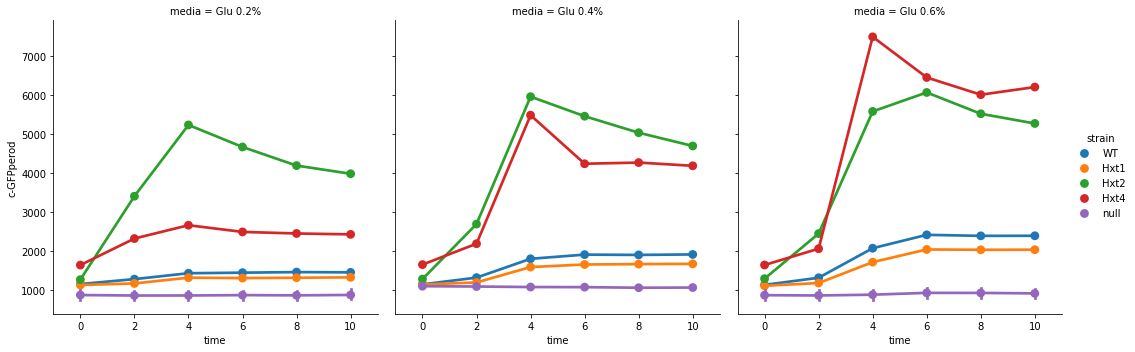

In [83]:
sns.factorplot(x='time', y='c-GFPperod',hue= 'strain', col='media', data=tidydf)



### Glucose response curve of Hxt4-yEGFP at different times

/Users/s1259407/.juliapro/JuliaPro_v1.0.3.1/conda/3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


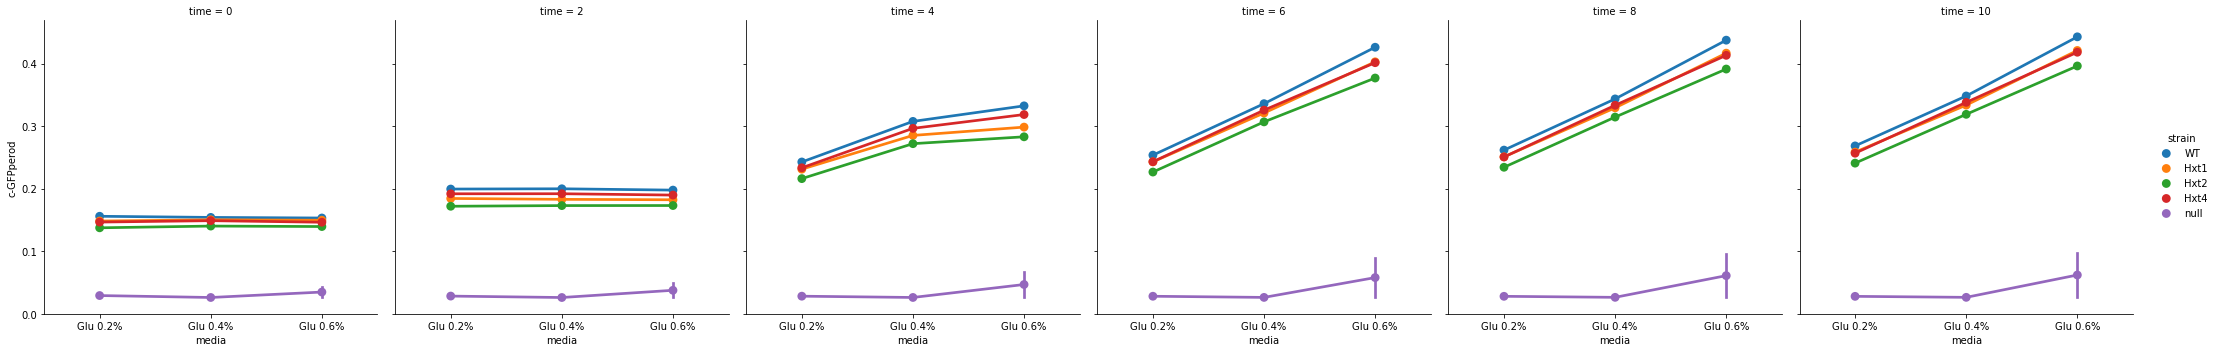

In [43]:
sns.factorplot(x='media', y='c-GFPperod',hue= 'strain', col='time', data=tidydf)


conclusion: the glucose dependency of Hxt4 depends heavily on time.

It looks like Hxt4 expression is always allocated to the 'drop in growth' regime.

# Analysis of point statistics through dataframes and seaborn 


## Extracting single-point statistics of all experiments

We are usually interested in one point-statistics about our strains. We will extract a lot of useful statistics and put them into a very nice pandas dataframe, which we will use for analysis. we want to exclude the media conditions, which are irrelevant and provide a lot of missing values. 





In [109]:
hxt4df=self.makedataframe()
hxt4df= DFsubset(hxt4df, 'strain', ['409.Hxt4', '403.Hxt4std1', '506.Hxt4rgt2'])


Scalar variables registered (found in self.extractionFieldsScalar:
OD gp
OD logmaxlike
OD_GP
area under gr vs OD
area under gr vs OD var
corrections
doubling time
doubling time var
gp1ref for GFP
ignoredwells
lag time
lag time var
local max gr
local max gr var
log2 OD ratio
log2 OD ratio var
max OD
max OD var
max gr
max gr var
normalized area under gr vs OD
normalized area under gr vs OD var
plateloc
refstrain
time of local max gr
time of local max gr var
time of max gr
time of max gr var

Time-varying variables registered (found in self.extractionFieldsTime:
AutoFL
AutoFL mean
AutoFL var
GFP
GFP mean
GFP var
OD
OD mean
OD var
Time centered at gr peak
c-GFP
c-GFP var
c-GFPperod
c-GFPperod var
d/dt gr
d/dt gr var
flogOD
flogOD var
fmerr for GFP
gr
gr var
time

problem finding half fluorescence time for WT in Glu 0.2%. obtaining time stats without FL background.
problem finding half fluorescence time for WT in Glu 0.2%. obtaining time stats without FL background.
problem finding half flu

# SECTION 5. Using Seaborn to easily plot single point statistics

The seaborn plotting library is very helpful in plotting data contained in a dataframe, particularly because it allows to seamlessly create comparative plots of data subgroups. it is related to R's ggplot2 though not quite the same. 

Seaborn plots come with predefined color maps and palettes to use, but if you are interested in building your own custom colormaps [here is a useful reference](http://seaborn.pydata.org/tutorial/color_palettes.html)


First, we want to obtain a classic monod curve that explains how the max growth rate is determined by the amount of available nutrient. 

We show how the final OD is a proxy for the amount of glucose in the medium, and build upon that.



In [111]:
#These are the statistics that we can plot
hxt4df.columns

Index(['experiment', 'media', 'strain', 'plateloc', 'OD gp', 'OD logmaxlike',
       'OD_GP', 'area under gr vs OD', 'area under gr vs OD var',
       'corrections', 'doubling time', 'doubling time var', 'gp1ref for GFP',
       'ignoredwells', 'lag time', 'lag time var', 'local max gr',
       'local max gr var', 'log2 OD ratio', 'log2 OD ratio var', 'max OD',
       'max OD var', 'max gr', 'max gr var', 'normalized area under gr vs OD',
       'normalized area under gr vs OD var', 'refstrain',
       'time of local max gr', 'time of local max gr var', 'time of max gr',
       'time of max gr var', 'gr auc', 'initial OD', 'final OD raw',
       'max OD raw', 'FLPeak', 'absolutePeakTime', 'alignedPeakTime',
       'responseTime', 'responseTimeAligned', 'halfFL', 'normalizedFLPeak',
       'slope', 'steepness', 'FLODFLPeak', 'FLODabsolutePeakTime',
       'FLODalignedPeakTime', 'FLODresponseTime', 'FLODresponseTimeAligned',
       'FLODhalfFL', 'FLODnormalizedFLPeak', 'FLODslope', 'FLOD

Text(0.5, 1.0, 'The std1 deletion has a later response time than the other strains')

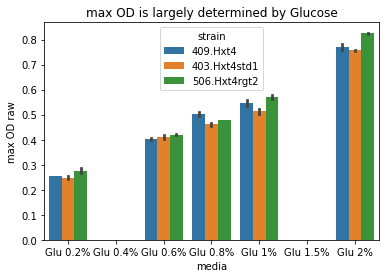

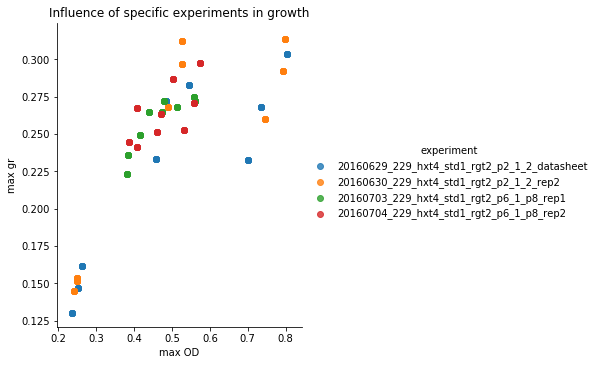

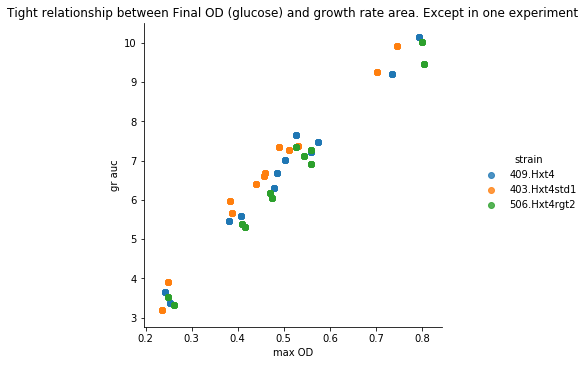

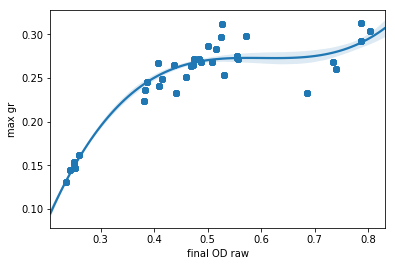

<Figure size 432x288 with 0 Axes>

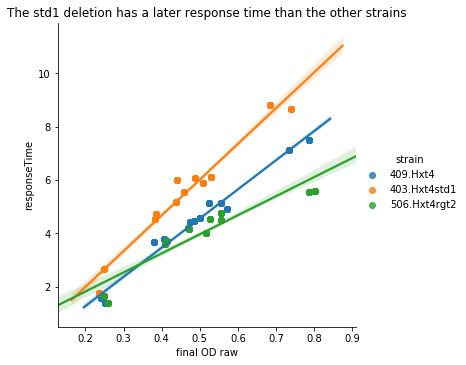

In [114]:
sns.barplot('media','max OD raw', order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'], hue='strain', data=hxt4df)
plt.title('max OD is largely determined by Glucose')
sns.lmplot('max OD','max gr', hue='experiment', data=hxt4df, fit_reg=False)
plt.title('Influence of specific experiments in growth')
sns.lmplot('max OD','gr auc', hue='strain', data=hxt4df, fit_reg=False)
plt.title('Tight relationship between Final OD (glucose) and growth rate area. Except in one experiment')
###monod curve excluding weird experiment
plt.figure()
sns.regplot('final OD raw','max gr', data=hxt4df, order=3)
plt.figure()
sns.lmplot('final OD raw','responseTime', data=hxt4df, hue='strain')
plt.title('The std1 deletion has a later response time than the other strains')

The results above show that one of the experiments included shows a dodgy behabiour with regard to the others. This opens the possibility to consider it an outlier.

<b>NOTE</b>: if growth looks oddly different than that from the other experiments, then it is probably worth rerunning getstats() on that experiment in case the gaussian process fit was suboptimal.

## Bar plots to compare statistics between media and strains

Naturally, we want to compare the expression obtained for all strains in all media. Normally ths would require plenty of code to organize the data and then format a plot. 

With seaborn, we do one-liners:

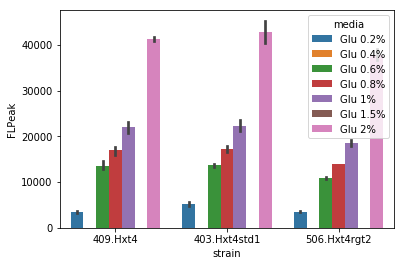

In [121]:
sns.barplot('strain', 'FLPeak', data=hxt4df, hue='media', hue_order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'])


## Linear models between variables 

### (Glucose vs FL Peak time)
We would like to know if the fluorescence peak time changes with glucose (proxied here by FinalOD) 
and with different genetic backgrounds.

Text(0.5, 1.0, 'Mutants peak earlier or later')

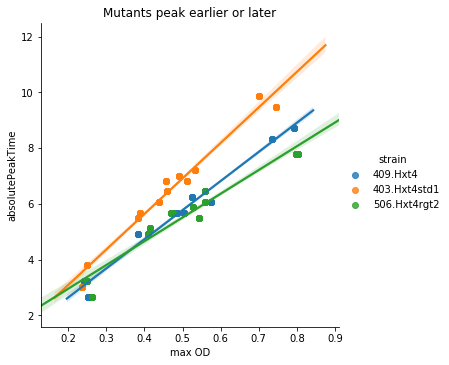

In [127]:
sns.lmplot('max OD', 'absolutePeakTime', hue='strain',data=DFsubset(hxt4df, 'strain', ['409.Hxt4', '403.Hxt4std1','506.Hxt4rgt2']))
plt.title('Mutants peak earlier or later')

# Save individual experiment pickles
One way to save your progress is running this script. 
Another more sustainable way is to package the .data structure into a pickle. This ensures that the data can be loaded in future versions of pr and accesspr.

In [80]:
pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/processedPickles'
for expt in self.allexperiments:
    pickle.dump(self.data[expt], open(pickleFileFolder+'/'+expt+'.pkl', 'wb'))

pickle.dump(self.data, open('./accesspr_demo/demo_data.pkl', 'wb'))

# More fancy accesspr features coming soon...



# Appendix 1: Importing from scratch and processing data one by one. 

In the code below we both import and do basic processing of the experiments:
a) ignore faulty wells

b) correct autofluorescence by spectral unmixing.

c) get growth rate statistics by fitting a gaussian process

d) dump the processed files into the folder processedPickles.

#Note. the block has been disabled to avoid accidental processing as this demo comes with ready processed files.
enable it by switching the block into code


In [ ]:
#processing data. We process and dump the pickles into the processedPickles folder. 
#before running this block you might want to verify that there are no pickles in processedPickles, otherwise processing might have already been done and they will be overwritten.

##making the pickle folder to be procesedPickles
pickleFileFolder=homedir+'/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/processedPickles'


mydir20160629= homedir+dataPath+'/20160629_229_hxt4_std1_rgt2_p2_1_2/'
p20160629=pr.platereader(mydir20160629+'20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet.xlsx', mydir20160629+'20160629contents.xls')
p20160629.ignorewells(['F4', 'E4', 'C10', 'D10', 'E10', 'F10', 'E2', 'F2', 'C8', 'D8' ,'E8', 'F8', 'D11', 'E11', 'F11', 'D3', 'F3', 'E3', 'C9', 'D9', 'E9', 'F9']) ###may wells are not great due to bumps but we cannot afford to remove them.
p20160629.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160629.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)

pickle.dump(p20160629, open(pickleFileFolder+'/p20160629.pkl', 'wb'))


mydir20160630= homedir+dataPath+'/20160630_229_hxt4_std1_rgt2_p2_1_2_rep2/'
p20160630=pr.platereader(mydir20160630+'20160630_229_hxt4_std1_rgt2_p2_1_2_rep2.xlsx', mydir20160630+'20160630contents.xls')
p20160630.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160630.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)
pickle.dump(p20160630, open(pickleFileFolder+'/p20160630.pkl', 'wb'))


mydir20160701= homedir+dataPath+'/20160701_229_hxt4_std1_rgt2_p4_1_1p5/'
p20160701=pr.platereader(mydir20160701+'20160701_229_hxt4_std1_rgt2_p4_1_1p5.xlsx', mydir20160701+'20160701contents.xls', asheetnumber=0, dsheetnumber=1)
p20160701.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160701.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)
pickle.dump(p20160701, open(pickleFileFolder+'/p20160701.pkl', 'wb'))


mydir20160702= homedir+dataPath+'/20160702_229_hxt4_std1_rgt2_p4_1_1p5/'
p20160702=pr.platereader(mydir20160702+'20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2.xlsx', mydir20160702+'20160702contents.xls', asheetnumber=0, dsheetnumber=2)
p20160702.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160702.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)
pickle.dump(p20160702, open(pickleFileFolder+'/p20160702.pkl', 'wb'))


mydir20160703= homedir+dataPath+'/20160703_229_hxt4_std1_rgt2_p6_1_p8/'
p20160703=pr.platereader(mydir20160703+'20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1.xlsx', mydir20160703+'20160703contents.xls')
p20160703.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160703.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)
pickle.dump(p20160703, open(pickleFileFolder+'/p20160703.pkl', 'wb'))


mydir20160704= homedir+dataPath+'/20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2/'
p20160704=pr.platereader(mydir20160704+'20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2.xlsx', mydir20160704+'20160704contents.xls', asheetname='20160704contents', dsheetname='data')
p20160704.ignorewells(['H1', 'H2', 'H3'])
p20160704.correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
p20160704.getstats(cvfn='nn', bd={0:[-2,2] }, noruns=10)
pickle.dump(p20160704, open(pickleFileFolder+'/p20160704.pkl', 'wb'))



# Appendix 2: What happens during initialisation

When calling Accesspr, these actions are performed:

a) find and index all readable and annotated experiments. 

b) Shelf unreadable experiment names in self.failedfiles.

c) Determine all the variables in all experiments. For example, one experiment may have growth rate calculations and another one CFP measurements.

d) Index every replicate, strain, and statistic measured and calculated for every experiment.

e) Attempt to find a supporting fluorescence for each experiments: a fluorescence at different gain. **This is only important when preprocessing experiments**

f) Attempt to align experiments (generate a 'time' variable in which 0 corresponds to the time of maximum growth rate)

# Customising batch import: Ignoring and only choosing certain experiments.


## ignoreFiles
If there are experiments you wish to not import or deal with,  povide a list of experiment names ignoreFiles=[filename1, filename2]

I you notice, the p20160212.pkl experiment does not have strains with the names or strains we expected, other than hxt4. 
As we are not interested in these strains for now, we just ignore the file. 

## onlyFiles
if there is one or some experiments that you'd rather only import instead of the whole cohort, you can also nclude such list of experiments in onlyFiles.

## ignorepickles
Only import excel files

## ignorexls
Dismiss all excel sheets and go straight to the pickle files.

## Reassigning experiments'  default Fluorescence channels

Each experiment is, by default, assigned the fluorescence channels that were either defined during the creation of the xpr object or is assigned a channel based on a channel that is present in all the experiments. This channel and its channelperod will ultimately be used for data extraction, so if you want to change what channel to be extracted from what experiment you can modify by accessing the xpr.FL dictionary, and re-entering the xpr.FL[expt]['mainFL']  or xpr.FL[expt]['mainFLperod'] for a particular eperiment. <b>Only reassign channels when you are completely sure of what you are doing</b>. 

## Why this is useful

Sometimes we have experiments with the same fluorescence recorded at different gains, or you transformed the data in some channel to be comparable across experiments. by using this structure you will avoid special treatment of those special circumstances every single time you call the experiment. 

In [15]:
#you can call the function xpr.assignFL
#see what happens when you change GFP for AutoFL. But once you check, bring it back to GFP!

self.assignFL(mainFL=['GFP'])


self.FL

{'20160212_77_hxt1_hxt2_hxt4': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var',
  'supportingFL': ['unassigned']},
 '20160629_229_hxt4_std1_rgt2_p2_1_2_datasheet': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var',
  'supportingFL': ['unassigned']},
 '20160630_229_hxt4_std1_rgt2_p2_1_2_rep2': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var',
  'supportingFL': ['unassigned']},
 '20160703_229_hxt4_std1_rgt2_p6_1_p8_rep1': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var',
  'supportingFL': ['unassigned']},
 '20160704_229_hxt4_std1_rgt2_p6_1_p8_rep2': {'mainFL': 'GFP',
  'mainFLperod': 'c-GFPperod',
  'mainFLperodvar': 'c-GFPperod var',
  'supportingFL': ['unassigned']}}

## Appendix 3. Dealing with impossible-to-load experiments

Ocasionally there will be trouble importing some experiments. if that is the case you wil find the xpr.failedfiles dicitonary, which will tell you exactly which experiments couldn't be opened. The import routine mentions which experiments were not imported and why. 


In [21]:
#first we check out a list of the experiments that were not imported
self.failedfiles

[['/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160701_229_hxt4_std1_rgt2_p4_1_1p5/20160701_229_hxt4_std1_rgt2_p4_1_1p5.xlsx',
  '/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160701_229_hxt4_std1_rgt2_p4_1_1p5/20160701contents.xls'],
 ['/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160702_229_hxt4_std1_rgt2_p4_1_1p5/20160702_229_hxt4_std1_rgt2_p4_1_1p5_rep2.xlsx',
  '/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo/experimentData/20160702_229_hxt4_std1_rgt2_p4_1_1p5/20160702contents.xls']]

In [77]:
##after troubleshooting a bit further we can try to import one of the files again
#to see if we can pin down the problem. an out of bounds problem indicates that the last sheet doesn't ook like
#normal platereader data. Other messages could indicate that the file is corrupt so try to resource it. 

self.openfailed(1)

IndexError: list index out of range

# Appendix 4. preprocessing experiments for nans and machine normalisation

Fluroescence may sometimes overflow, resulting in NaNs. for some gains, but not for other gains.

If this happens and you have supporting fluroescence measurements, for example at a lower gain:

a) the values of the supporting are mapped to the higher one by linear mapping
b) the remapped supporting fluorescence substitutes entirely the main fluorescence measurement. This usually works well. 

If the data comes from different plate readers, data of plate reader 1 will be mapped to values of plater eader 2 via a well defined linear mapping. the remapping function varies from machine to machine and also across fluroescent proteins.


To preprocess your experiments, simply run: self.preprocessAll2() and whatever experiments can be preprocessed will be so. 






# Appendix 5. self.plotrepmean(): Bootstrapping replicates for different experiments 

When several replicates for one experiment are collected, one could simply average them all, but one or two experiments may affect the mean estimation. Therefore by adding the argument bootstrap = n, then the average of n random combinations of experiments is put together, increasing robustness to outlier experiments. bootstraping is not done for individual values, but for the entire experiment value. 

In this tutorial we do not show this as there are only 2 experiments per condition, but this can be done when collecting more experiments.

# Interpolation  and resampling of timepoints across experiment

The process involves the following: 

a)Define lower and upper boundaries of interpolation. one experiment may ebe too short or another one could have a later starting point than others. also the time could otherwise go from -infinite to infinite otherwise.

b) define a general time for all samples. If not predefined, the times will be chosen arbitrarily across the experiments. 

c) use linear interpolation to sample the data at the generalised time

d) organise the data.

The function self.interptimesnew() bares the load of these processes. It is called for during self.makedataframe('timerow'/'timecol') and during self.plotrepmean 

# Appendix 6. Colour Management
## Assigning, randomising and storing plot colors

If you notice closely, the method xpr.plotRawReplicates outputs a dictionary that indicates what color was used for each experiment. When colours are not indicated, they are generated randomly. the selected colour dictionary are returned by the function:

self.plotRawReplicates: the colours are the main return value
selt.plotrepmean: the colours are the second return value (the third one is the markers)

You can then store those dictionaries and provide them as inputs for other plotting functions.

## Making colour dictionaries yourself

The simplest way to make a colour dictionary is through the function ppf.colorDict()
first input is a list of keys, the second one is a list of colors. 

the file colors (imported) contains colour palettes that you can readily call:
colors.strongColors
colors.nicePastels
colors.blueColors
colors.magentaColors
colors.greenColors
colors.redColors

## Making a legend with colour dictionaries

prPlottingFunctions allows to quickly create a legend with such colours using ppf.createFigLegend(dic=color_dictionary, loc='upper_right')





No handles with labels found to put in legend.


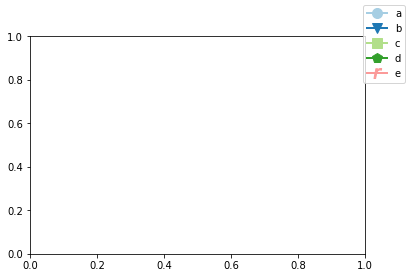

In [24]:
di=ppf.colorDict(keys=['a', 'b', 'c', 'd', 'e'], colors=colors.strongColors)
plt.axes()
ppf.createFigLegend(dic=di, loc='upper right', markers=['o', 'v', 's', 'p', '$r$'])

In [76]:
## Discontinued script for future update
cols=np.row_stack([np.column_stack([np.linspace(0,0,100),np.linspace(1,0,100),np.linspace(1,0,100),np.linspace(1,1,100)]),
np.column_stack([np.linspace(0,1,100),np.linspace(0,0,100),np.linspace(0,1,100),np.linspace(1,1,100)])])

cmap = matplotlib.colors.ListedColormap(cols, name='from_list', N=None)

colorBy='d/dtc-GFPperod'
xstat='time'

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('growth rates for each sugar by strain. color= OD')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(1,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat=xstat, colorBy='ODmn', ystat='gr', vmin=0,vmax=2, cmap='viridis')
            plt.ylim([-.3, .5])
            plt.title(strain)
            plt.xlabel('Time')
            plt.ylabel('gr')
#plt.colorbar()
plt.figure(figsize=[20,10])

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('expression timing is disrupted in mutants. color= expression rate')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(1,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat=xstat, ystat='gr', colorBy=colorBy, cmap=cmap, vmin=-30, vmax=30)
            plt.ylim([-.3, .5])
            plt.title(strain)
            plt.xlabel('Time')
            plt.ylabel('gr')
            
plt.figure(figsize=[20,20])

for expt in xpr.allExperiments:
    #plt.figure()
    plt.suptitle('expression timing is disrupted in mutants. color= expression rate')
    for j in range(0,np.size(xpr.data[expt].allstrains)):
        strain=xpr.data[expt].allstrains[j]
        plt.subplot(7,np.size(xpr.data[expt].allstrains), j+1)
        for md in xpr.data[expt].d.keys():
            colorContour(xpr.data[expt], media=md, strain=strain, xstat='OD', ystat='c-GFPperod', colorBy=colorBy, cmap=cmap)#color=strainColors[strain])
            #plt.ylim([-.3, .5])
            #plt.xlim([-.2, 2])
            plt.title(strain)
            plt.xlabel('OD')
            plt.ylabel('GFPperod')
#plt.colorbar()

NameError: name 'matplotlib' is not defined